In [ ]:
# Import main libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import csv
from PIL import Image
from scipy.ndimage import rotate
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import models, layers
# Pretty display for notebooks
%matplotlib inline

In [ ]:
# Loading dataset into dataframes
X_train_letters = pd.read_csv("C:\\Users\\Omar\\Downloads\\archive\\training images.csv",  header=None)
y_train_letters = pd.read_csv("C:\\Users\\Omar\\Downloads\\archive\\training labels.csv",  header=None)
X_test_letters = pd.read_csv("C:\\Users\\Omar\\Downloads\\archive\\testing images.csv",  header=None)
y_test_letters = pd.read_csv("C:\\Users\\Omar\\Downloads\\archive\\testing labels.csv",  header=None)

# print statistics about the dataset
print("There are %d train Arabic letter images" %X_train_letters.shape[0])
print("There are %d test Arabic letter images" %X_test_letters.shape[0])
X_train_letters.head()

There are 13440 train Arabic letter images
There are 3360 test Arabic letter images


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_letters.shape

(13440, 4096)

In [ ]:
# Loading dataset into dataframes
X_train_digits = pd.read_csv('C:\\Users\\Omar\\Downloads\\archive (1)\\training images.csv', header=None)
y_train_digits = pd.read_csv('C:\\Users\\Omar\\Downloads\\archive (1)\\training labels.csv', header=None)
X_test_digits = pd.read_csv('C:\\Users\\Omar\\Downloads\\archive (1)\\testing images.csv', header=None)
y_test_digits = pd.read_csv('C:\\Users\\Omar\\Downloads\\archive (1)\\testing labels.csv', header=None)

# print statistics about the dataset
print("There are %d training arabic digit images  " %X_train_digits.shape[0])
print("There are %d testing arabic digit images " %X_test_digits.shape[0])


In [ ]:
X_train_digits.shape

In [ ]:
def convert_values_to_image(image_values):
  image_array = np.asarray(image_values)
  image_array = image_array.reshape(64, 64).astype('uint8')
  # The original dataset is reflected so we will flip it then rotate for a better view only.
  image_array = np.flip(image_array, 0)
  image_array = rotate(image_array, -90)
  new_image = Image.fromarray(image_array)
  new_image.show()
  return new_image

In [ ]:
# For digits data
X_train_digits_scaled = X_train_digits.values.astype('float32') / 255
y_train_digits = y_train_digits.astype('int32')

X_test_digits_scaled = X_test_digits.values.astype('float32') / 255
y_test_digits= y_test_digits.astype('int32')

# For letters data
X_train_letters_scaled = X_train_letters.values.astype('float32') / 255
y_train_letters = y_train_letters.astype('int32')

X_test_letters_scaled = X_test_letters.values.astype('float32') / 255
y_test_letters = y_test_letters.astype('int32')


In [ ]:
from keras.utils import to_categorical

# One-hot encoding for letters dataset
number_of_classes = 38
# Assuming y_train_letters and y_test_letters are class indices for letters
y_train_letters_encoded  = to_categorical(y_train_letters, num_classes=number_of_classes)
y_test_letters_encoded = to_categorical(y_test_letters, num_classes=number_of_classes)

# Assuming y_train_digits and y_test_digits are class indices for digits
y_train_digits_encoded  = to_categorical(y_train_digits, num_classes=number_of_classes)
y_test_digits_encoded  = to_categorical(y_test_digits, num_classes=number_of_classes)

In [ ]:
# Reshape digit images
X_train_digits_scaled = X_train_digits_scaled.reshape([-1, 64, 64, 1])

# Reshape letter images
X_test_digits_scaled = X_test_digits_scaled.reshape([-1, 64, 64, 1])

# Reshape letter images
X_train_letters_scaled = X_train_letters_scaled.reshape([-1, 64, 64, 1])

# Reshape letter images
X_test_letters_scaled = X_test_letters_scaled.reshape([-1, 64, 64, 1])

# Print the shapes
print(X_train_digits_scaled.shape, y_train_digits_encoded.shape, X_test_digits_scaled.shape, y_test_digits_encoded.shape)
print(X_train_letters_scaled.shape, y_train_letters_encoded.shape, X_test_letters_scaled.shape, y_test_letters_encoded.shape)

(60000, 64, 64, 1) (60000, 38) (10000, 64, 64, 1) (10000, 38)
(13440, 64, 64, 1) (13440, 38) (3360, 64, 64, 1) (3360, 38)


In [ ]:
# Concatenate training data
X_train = np.concatenate((X_train_digits_scaled, X_train_letters_scaled), axis=0)
y_train = np.concatenate((y_train_digits_encoded, y_train_letters_encoded), axis=0)
print("Total Training images are {} images of shape".format(X_train.shape[0]))
print(X_train.shape, y_train.shape)

# Concatenate testing data
X_test = np.concatenate((X_test_digits_scaled, X_test_letters_scaled), axis=0)
y_test = np.concatenate((y_test_digits_encoded, y_test_letters_encoded), axis=0)
print("Total Testing images are {} images of shape".format(X_test.shape[0]))
print(X_test.shape, y_test.shape)


Total Training images are 73440 images of shape
(73440, 64, 64, 1) (73440, 38)
Total Testing images are 13360 images of shape
(13360, 64, 64, 1) (13360, 38)


In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense

model = models.Sequential()

 # create model

model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(64, 64, 1), kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

  #Fully connected final layer
model.add(Dense(38, activation='softmax'))

  # Compile model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [ ]:
checkpointer = ModelCheckpoint(filepath='weightsfromcnn.hdf5', verbose=1, save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20, batch_size=64, verbose=1, callbacks=[checkpointer])

Epoch 1/20
1148/1148 [==============================] - ETA: 0s - loss: 0.5190 - accuracy: 0.8687
Epoch 1: val_loss improved from inf to 2.40682, saving model to weightsfromcnn.hdf5
1148/1148 [==============================] - 24s 15ms/step - loss: 0.5190 - accuracy: 0.8687 - val_loss: 2.4068 - val_accuracy: 0.5510
Epoch 2/20
1148/1148 [==============================] - ETA: 0s - loss: 0.1259 - accuracy: 0.9634
Epoch 2: val_loss improved from 2.40682 to 1.61945, saving model to weightsfromcnn.hdf5
1148/1148 [==============================] - 15s 13ms/step - loss: 0.1259 - accuracy: 0.9634 - val_loss: 1.6194 - val_accuracy: 0.7239
Epoch 3/20
1145/1148 [============================>.] - ETA: 0s - loss: 0.0856 - accuracy: 0.9748
Epoch 3: val_loss improved from 1.61945 to 0.15143, saving model to weightsfromcnn.hdf5
1148/1148 [==============================] - 15s 13ms/step - loss: 0.0858 - accuracy: 0.9747 - val_loss: 0.1514 - val_accuracy: 0.9526
Epoch 4/20
1146/1148 [===================

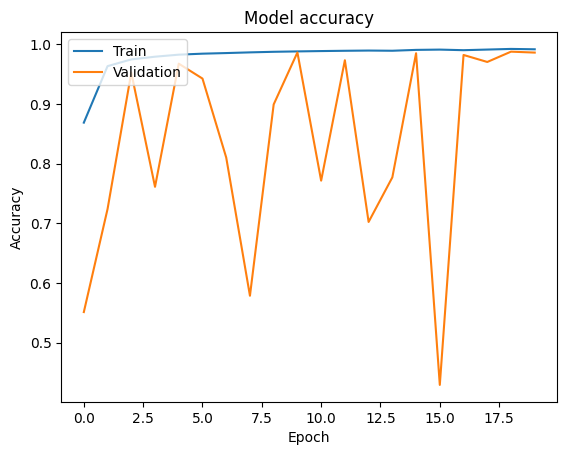

In [ ]:
# Plot training & validation accuracy of the frist training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()